In [1]:
import pandas as pd
import numpy as np

In [2]:
import datetime

In [3]:
path_to_file='../../../data'

# Viaggi

In [4]:
viaggi = pd.read_csv(
    f'{path_to_file}/viaggi.csv',
    sep='*',
    decimal=','
)
viaggi 
# si nota:
#  - presenza di NaN
#  - presenza di colonne con dentro liste
#  - presenza di colonne con formati di tempo da interpretare
#  - presenza di colonna con unità di misura/percentuale

,idUtente,idVeicolo,caricaBatteriaInizio,dueCaschiDisponibili,luogoRitiro,timestampRitiro,luogoConsegna,timestampConsegna,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
0,u5954,v33,100.0%,YES,"[(44.394923, 8.943928), (44.394857, 8.943474),...","['2018-10-01 01:08:57', '2018-10-01 01:09:02',...","[(44.433961, 8.95907), (44.434021, 8.958851), ...","['2018-10-01 01:21:57', '2018-10-01 01:22:02',...",4.5046 km,0:13:20,7.55,90.2%
1,u1478,v33,91.8%,NaN,"[(44.433997, 8.958993), (44.433596, 8.959153),...","['2018-10-01 02:09:21', '2018-10-01 02:09:26',...","[(44.396783, 8.940881), (44.396705, 8.940446),...","['2018-10-01 02:21:06', '2018-10-01 02:21:11',...",4.3622 km,0:12:05,7.78,81.8%
2,u3403,v103,100.0%,YES,"[(44.50046, 8.903424), (44.500047, 8.903264), ...","['2018-10-01 02:56:08', '2018-10-01 02:56:13',...","[(44.417878, 8.921285), (44.417927, 8.92169), ...","['2018-10-01 03:23:29', '2018-10-01 03:23:34',...",9.2642 km,0:27:41,8.02,82.6%
3,u3723,v6,100.0%,YES,"[(44.404821, 8.959312), (44.404645, 8.959509),...","['2018-10-01 03:45:47', '2018-10-01 03:45:52',...","[(44.427887, 8.844981), (44.428135, 8.845328),...","['2018-10-01 04:14:12', '2018-10-01 04:14:17',...",9.4183 km,0:28:45,8.23,84.2%
4,u8584,v95,100.0%,YES,"[(44.416034, 8.933454), (44.416018, 8.93355), ...","['2018-10-01 05:15:03', '2018-10-01 05:15:08',...","[(44.421412, 8.865522), (44.422039, 8.865464),...","['2018-10-01 05:33:20', '2018-10-01 05:33:25',...",5.4345 km,0:18:37,5.20,88.0%
...,...,...,...,...,...,...,...,...,...,...,...,...
124832,u6500,v76,100.0%,YES,"[(44.417679, 8.888708), (44.417619, 8.888866),...","['2021-04-14 20:40:56', '2021-04-14 20:41:01',...","[(44.425219, 8.836838), (44.424889, 8.837571),...","['2021-04-14 20:53:51', '2021-04-14 20:53:56',...",4.192 km,0:13:15,7.48,91.8%
124833,u2158,v23,100.0%,YES,"[(44.436424, 8.877843), (44.436216, 8.877769),...","['2021-04-15 06:39:32', '2021-04-15 06:39:37',...","[(44.417006, 8.917939), (44.417142, 8.918543),...","['2021-04-15 06:52:19', '2021-04-15 06:52:24',...",3.8649 km,0:13:07,5.65,92.3%
124834,u7353,v76,100.0%,NO,"[(44.425068, 8.837088), (44.424729, 8.83693), ...","['2021-04-15 18:38:58', '2021-04-15 18:39:03',...","[(44.412444, 8.897074), (44.41222, 8.897165), ...","['2021-04-15 18:54:52', '2021-04-15 18:54:57',...",4.9921 km,0:16:14,5.26,92.1%
124835,u672,v37,100.0%,YES,"[(44.416773, 8.932171), (44.416548, 8.932004),...","['2021-04-15 20:20:26', '2021-04-15 20:20:31',...","[(44.393321, 8.934669), (44.39349, 8.934432), ...","['2021-04-15 20:28:30', '2021-04-15 20:28:35',...",2.6225 km,0:08:24,7.52,97.0%


In [5]:
# conversione tempoViaggio a timedelta
viaggi["tempoViaggio"]=pd.to_timedelta(viaggi["tempoViaggio"])

# conversione distanzaPercorsa a float
viaggi["distanzaPercorsa"]=viaggi["distanzaPercorsa"].str[:-3].astype(float)

# conversione caricaBatteriaInizio, caricaBatteriaFine a float
viaggi["caricaBatteriaInizio"]=viaggi["caricaBatteriaFine"].str[:-2].astype(float)
viaggi["caricaBatteriaFine"]=viaggi["caricaBatteriaFine"].str[:-2].astype(float)

# conversione timestampRitiro, timestampConsegna a lista di stringhe
viaggi["timestampRitiro"]=viaggi["timestampRitiro"].apply(lambda location_list: eval(location_list))
viaggi["timestampConsegna"]=viaggi["timestampConsegna"].apply(lambda location_list: eval(location_list))

# conversione timestampRitiro e timestampConsegna a lista di datetime
viaggi["timestampRitiro"] = viaggi["timestampRitiro"].apply(lambda timestr_list: [pd.to_datetime(timestr) for timestr in timestr_list])
viaggi["timestampConsegna"] = viaggi["timestampConsegna"].apply(lambda timestr_list: [pd.to_datetime(timestr) for timestr in timestr_list])

def mean_of_timestamps(timestamp_list):
    sum_of_timestamp = 0
    for timestamp in timestamp_list:
        sum_of_timestamp = sum_of_timestamp+timestamp.timestamp()
    return pd.Timestamp.fromtimestamp(sum_of_timestamp/len(timestamp_list))

# aggregazione (media) dei timestamp
viaggi["timestampRitiro"]=viaggi["timestampRitiro"].apply(mean_of_timestamps)
viaggi["timestampConsegna"]=viaggi["timestampConsegna"].apply(mean_of_timestamps)


# conversione luogoRitiro, luogoConsegna a lista di float
viaggi["luogoConsegna"]=viaggi["luogoConsegna"].apply(lambda location_list: eval(location_list))
viaggi["luogoRitiro"]=viaggi["luogoRitiro"].apply(lambda location_list: eval(location_list))
# aggregazione (media) dei luoghi
viaggi["luogoConsegna"]=viaggi["luogoConsegna"].apply(lambda coord_list: np.mean(coord_list, axis=0))
viaggi["luogoRitiro"]=viaggi["luogoRitiro"].apply(lambda coord_list: np.mean(coord_list, axis=0))

# riempo vuoti con valore testuale
viaggi['dueCaschiDisponibili']=viaggi['dueCaschiDisponibili'].fillna("N.D.")

In [6]:
viaggi

,idUtente,idVeicolo,caricaBatteriaInizio,dueCaschiDisponibili,luogoRitiro,timestampRitiro,luogoConsegna,timestampConsegna,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
0,u5954,v33,90.0,YES,"[44.3949164, 8.943868]",2018-10-01 03:09:07,"[44.433909400000005, 8.9589388]",2018-10-01 03:22:07,4.5046,0 days 00:13:20,7.55,90.0
1,u1478,v33,81.0,N.D.,"[44.433860800000005, 8.959106199999999]",2018-10-01 04:09:31,"[44.396883200000005, 8.940874399999998]",2018-10-01 04:21:16,4.3622,0 days 00:12:05,7.78,81.0
2,u3403,v103,82.0,YES,"[44.500279199999994, 8.9034992]",2018-10-01 04:56:18,"[44.4180398, 8.9215326]",2018-10-01 05:23:39,9.2642,0 days 00:27:41,8.02,82.0
3,u3723,v6,84.0,YES,"[44.404679, 8.959317799999999]",2018-10-01 05:45:57,"[44.4277104, 8.8453598]",2018-10-01 06:14:22,9.4183,0 days 00:28:45,8.23,84.0
4,u8584,v95,88.0,YES,"[44.415998200000004, 8.933568]",2018-10-01 07:15:13,"[44.42167679999999, 8.865576]",2018-10-01 07:33:30,5.4345,0 days 00:18:37,5.20,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124832,u6500,v76,91.0,YES,"[44.417578, 8.8888134]",2021-04-14 22:41:06,"[44.4250652, 8.8371964]",2021-04-14 22:54:01,4.1920,0 days 00:13:15,7.48,91.0
124833,u2158,v23,92.0,YES,"[44.436419, 8.877830000000001]",2021-04-15 08:39:42,"[44.4171218, 8.918298799999999]",2021-04-15 08:52:29,3.8649,0 days 00:13:07,5.65,92.0
124834,u7353,v76,92.0,NO,"[44.424991, 8.8371318]",2021-04-15 20:39:08,"[44.412111200000005, 8.8970386]",2021-04-15 20:55:02,4.9921,0 days 00:16:14,5.26,92.0
124835,u672,v37,97.0,YES,"[44.416808200000006, 8.931971800000001]",2021-04-15 22:20:36,"[44.3933162, 8.9348282]",2021-04-15 22:28:40,2.6225,0 days 00:08:24,7.52,97.0


# Utenti

In [7]:
# leggo utenti
utenti = pd.read_csv(
    f'{path_to_file}/utenti.csv',
    sep='|',
    decimal=',',
    dtype={
        'LAT INDIRIZZO': float,
        'LON INDIRIZZO': float,
        'CONSENSO al TRATTAMENTO dei DATI': bool
    },
    parse_dates=[
        'DATA di NASCITA',
        'DATA ULTIMO RINNOVO PATENTE'
    ]
)
utenti

,ID UTENTE,NOME,COGNOME,SESSO,DATA di NASCITA,LUOGO di NASCITA,C.F.,INDIRIZZO E-MAIL,INDIRIZZO,LAT INDIRIZZO,LON INDIRIZZO,PATENTE #,DATA ULTIMO RINNOVO PATENTE,CONSENSO al TRATTAMENTO dei DATI,TITOLO di STUDIO
0,u6586,Dario,Nibali,M,1986-12-09,Torino,NBLDRA86P12L219E,NaN,"GENOVA, VIA VAL D'ASTICO, 156",44.494692,8.908447,U19713653J,2019-03-30,False,NaN
1,u2188,Giacinto,Ferraris,M,1986-05-24,Carrara,FRRGNT86E24B832A,ferraris86@vodafone.it,"GENOVA, VIA SAMBUGO, 10",44.449108,8.696334,U18283370F,2019-08-19,False,diploma di scuola secondaria superiore (4-5 anni)
2,u5528,Fiorenzo,Morosini,M,1988-11-02,Siena,MRSFNZ88B11I726L,NaN,"GENOVA, VIA DI BURLO, 1",44.442037,8.875526,U10335012S,2014-01-25,False,NaN
3,u1224,Ruggero,Ciani,M,1974-11-26,Lavagna,CNIRGR74S26E488U,NaN,"GENOVA, VIA CEBA', 3",44.408544,8.936078,U12038058X,2018-10-08,False,diploma di scuola secondaria superiore (4-5 anni)
4,u6553,Umberto,Baglioni,M,1985-03-15,Monza,BGLMRT85C15F704T,NaN,"GENOVA, CORSO ITALIA, 7",44.391427,8.956002,U11861180V,2017-11-13,True,licenza di scuola elementare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,u4216,Benito,Belletini,M,1977-01-14,Piacenza,BLLBNT77A14G535V,belletini77@poste.it,"GENOVA, VIA GIUSEPPE FEDELINI, 65",44.433942,8.780536,U13942236C,2019-07-24,True,licenza di scuola media inferiore o di avviam...
8996,u4557,Ettore,Fanucci,M,1977-01-30,Genova,FNCTTR77A30D969F,ettore.fanucci@poste.it,"GENOVA, VIA ALL'OPERA PIA, 8",44.402442,8.960272,U12477850I,2018-06-30,False,NaN
8997,u7048,Tiziano,Camiscione,M,1995-05-08,Genova,CMSTZN95M05D969K,NaN,"GENOVA, VIA FONTANEGLI, 38",44.435231,9.019706,U15990877Y,2011-10-11,True,diploma di scuola secondaria superiore (2-3 anni)
8998,u1728,Licia,Muratori,F,1971-04-12,Taggia,MRTLCI71T44L024L,licia.muratori@libero.it,"GENOVA, VIA UMBERTO FRACCHIA, 1",44.423078,8.921330,U15474061R,2017-05-27,True,licenza di scuola elementare


# Scooter

In [8]:
scooter = pd.read_csv(
    f'{path_to_file}/scooter.csv',
    sep=';',
)
scooter 
# si nota:
#  - presenza di colonna con unità di misura/percentuale
#  - presenza di colonna con data


,Veicolo,Activation Number,Versione n°,Targa,Costo,Data Registrazione
0,v114,16,3,X8X2NL,"9.860,00 €",01/20/2020
1,v89,43,2,X8VG3N,"5.860,00 €",06/01/2019
2,v50,2,3,X8X1PO,"5.630,00 €",01/14/2020
3,v93,87,1,X8TH2V,"7.760,00 €",08/28/2018
4,v73,54,3,X8XW2I,"9.840,00 €",01/24/2020
...,...,...,...,...,...,...
145,v46,80,2,X8V22C,"4.080,00 €",05/31/2019
146,v54,46,3,X8X8AZ,"9.720,00 €",01/22/2020
147,v48,100,2,X8V0OC,"5.460,00 €",05/22/2019
148,v105,27,3,X8X5LT,"5.970,00 €",01/19/2020


## Conversione costo a float

In [9]:
# normalizzo il costo
scooter['Costo']=scooter['Costo'].str[:-2].str.replace(".","").str.replace(",",".").astype(float)

<ipython-input-9-6bdd0a259bea>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  scooter['Costo']=scooter['Costo'].str[:-2].str.replace(".","").str.replace(",",".").astype(float)


## quante "versioni" di veicoli ci sono in giro?

In [10]:
# numero di veicolo per versione
scooter['Versione n°'].value_counts()

1    56
3    48
2    46
Name: Versione n°, dtype: int64

In [11]:
# denormalizzo viaggi e scooter
viaggi_scooter = viaggi.merge(scooter, left_on="idVeicolo", right_on="Veicolo")

In [12]:
# numero di viaggi per versione
viaggi_scooter['Versione n°'].value_counts()

1    64995
2    36625
3    23217
Name: Versione n°, dtype: int64

Versione n°
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: timestampRitiro, dtype: object

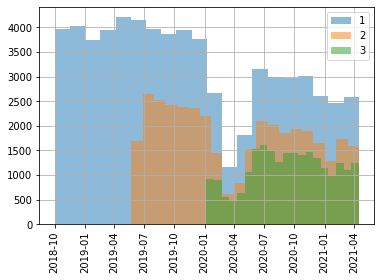

In [13]:
# numero di viaggi per versione, andamendo nel tempo --> ERRORE
viaggi_scooter.groupby("Versione n°")["timestampRitiro"].hist(bins=20,
                                                              alpha=.5,
                                                              legend=True,
                                                              xrot=90)

Versione n°
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: timestampRitiro, dtype: object

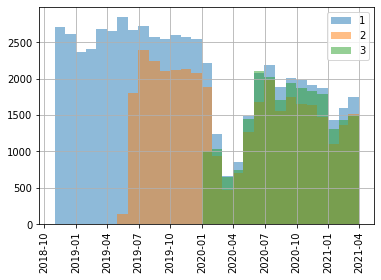

In [14]:
# numero di viaggi per versione, andamendo nel tempo --> ERRORE
viaggi_scooter.groupby("Versione n°")["timestampRitiro"].hist(bins=pd.date_range('2018-10-01',
                                                                                 '2021-04-01',
                                                                                 freq='M'),alpha=.5,legend=True, xrot=90)

## km. totali percorsi per veicolo?

In [15]:
# km totali per veicolo
viaggi_scooter.groupby('idVeicolo')['distanzaPercorsa'].sum()

idVeicolo
v0      8207.2072
v1      7310.1411
v10     1979.3761
v100    3984.9517
v101    9762.7874
          ...    
v95     3541.3882
v96     1955.1232
v97     2693.5946
v98     7623.5701
v99     4411.5636
Name: distanzaPercorsa, Length: 150, dtype: float64

<AxesSubplot:ylabel='Frequency'>

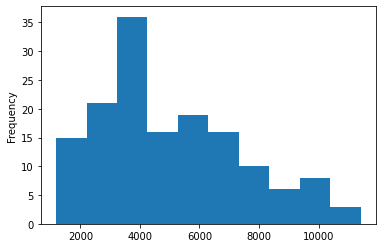

In [16]:
# plot distribuzione
viaggi_scooter.groupby('idVeicolo')['distanzaPercorsa'].sum().plot.hist()

##  ci sono utilizzi dei veicoli con patente scaduta?

In [17]:
# denormalizzo viaggi e utenti
viaggi_utenti = viaggi.merge(utenti, left_on="idUtente", right_on="ID UTENTE")

In [18]:
# cerco utenti che hanno fatto viaggi con patente non rinnovata da più di dieci anni
viaggi_utenti[viaggi_utenti['DATA ULTIMO RINNOVO PATENTE']+pd.Timedelta(10*365,'D')<viaggi_utenti["timestampRitiro"]]

,idUtente,idVeicolo,caricaBatteriaInizio,dueCaschiDisponibili,luogoRitiro,timestampRitiro,luogoConsegna,timestampConsegna,distanzaPercorsa,tempoViaggio,...,LUOGO di NASCITA,C.F.,INDIRIZZO E-MAIL,INDIRIZZO,LAT INDIRIZZO,LON INDIRIZZO,PATENTE #,DATA ULTIMO RINNOVO PATENTE,CONSENSO al TRATTAMENTO dei DATI,TITOLO di STUDIO
45448,u4770,v105,88.0,YES,"[44.4037958, 8.9350348]",2021-04-11 09:10:07,"[44.4322472, 8.8460346]",2021-04-11 09:32:20,7.751,0 days 00:22:33,...,Genova,MLCVTR72C14D969P,vittorio.malacarne@hotmail.it,"GENOVA, PIAZZA PORTICCIOLO, 9",44.424602,8.812005,U13889225G,2011-04-11,True,NaN


##  il profilo di utilizzo orario varia lungo la settimana?

In [19]:
# assegno giorno della settimana e ora ai viaggi
viaggi['weekday']=viaggi["timestampRitiro"].dt.day_name()
viaggi['hour']=viaggi["timestampRitiro"].dt.hour

In [20]:
# vedo risultato
viaggi

,idUtente,idVeicolo,caricaBatteriaInizio,dueCaschiDisponibili,luogoRitiro,timestampRitiro,luogoConsegna,timestampConsegna,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine,weekday,hour
0,u5954,v33,90.0,YES,"[44.3949164, 8.943868]",2018-10-01 03:09:07,"[44.433909400000005, 8.9589388]",2018-10-01 03:22:07,4.5046,0 days 00:13:20,7.55,90.0,Monday,3
1,u1478,v33,81.0,N.D.,"[44.433860800000005, 8.959106199999999]",2018-10-01 04:09:31,"[44.396883200000005, 8.940874399999998]",2018-10-01 04:21:16,4.3622,0 days 00:12:05,7.78,81.0,Monday,4
2,u3403,v103,82.0,YES,"[44.500279199999994, 8.9034992]",2018-10-01 04:56:18,"[44.4180398, 8.9215326]",2018-10-01 05:23:39,9.2642,0 days 00:27:41,8.02,82.0,Monday,4
3,u3723,v6,84.0,YES,"[44.404679, 8.959317799999999]",2018-10-01 05:45:57,"[44.4277104, 8.8453598]",2018-10-01 06:14:22,9.4183,0 days 00:28:45,8.23,84.0,Monday,5
4,u8584,v95,88.0,YES,"[44.415998200000004, 8.933568]",2018-10-01 07:15:13,"[44.42167679999999, 8.865576]",2018-10-01 07:33:30,5.4345,0 days 00:18:37,5.20,88.0,Monday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124832,u6500,v76,91.0,YES,"[44.417578, 8.8888134]",2021-04-14 22:41:06,"[44.4250652, 8.8371964]",2021-04-14 22:54:01,4.1920,0 days 00:13:15,7.48,91.0,Wednesday,22
124833,u2158,v23,92.0,YES,"[44.436419, 8.877830000000001]",2021-04-15 08:39:42,"[44.4171218, 8.918298799999999]",2021-04-15 08:52:29,3.8649,0 days 00:13:07,5.65,92.0,Thursday,8
124834,u7353,v76,92.0,NO,"[44.424991, 8.8371318]",2021-04-15 20:39:08,"[44.412111200000005, 8.8970386]",2021-04-15 20:55:02,4.9921,0 days 00:16:14,5.26,92.0,Thursday,20
124835,u672,v37,97.0,YES,"[44.416808200000006, 8.931971800000001]",2021-04-15 22:20:36,"[44.3933162, 8.9348282]",2021-04-15 22:28:40,2.6225,0 days 00:08:24,7.52,97.0,Thursday,22


In [21]:
# calcolo il numero di viaggi per giorno/ora
weekdays_hour_stats = viaggi.groupby(['weekday','hour']).size()

<AxesSubplot:xlabel='hour'>

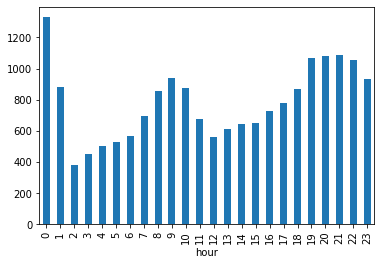

In [22]:
# plot dell'andamento giornaliero di lunedì
weekdays_hour_stats.loc['Monday'].sort_index().plot.bar()

<AxesSubplot:xlabel='hour'>

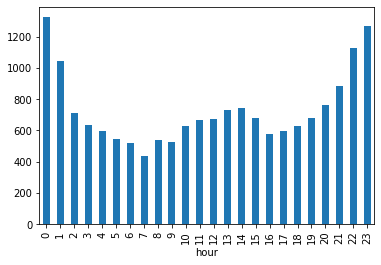

In [23]:
# plot dell'andamento giornaliero di domenica
weekdays_hour_stats.loc['Sunday'].sort_index().plot.bar()